## STPV Figures of Merit
Purpose is to compute figures of merit for structures in "High Temperature Selective Emitter Design and Materials: Titanium Aluminum Nitride Alloys for Thermophotovoltaics", specifically Structure III from figure 2  


 Results for Structure I
Spectral Efficiency:  0.5584446077512906
Spectral Power Density:  37287.258676487116
Spectral TPV Efficiency:  0.20021911519848862


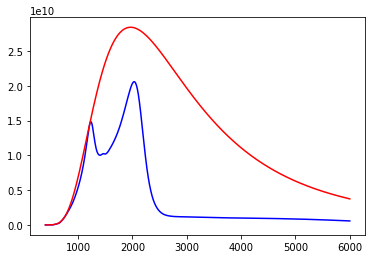

In [4]:
### Import WPTHERML class!
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib

### Define structure!
### Structure III in Fig 2
structureIII = {
         ### layer 2 is AlN for now, will make it an alloy later
        'Material_List': ['Air', 'Al2O3', 'AlN', 'Al2O3', 'HfO2', 'Al2O3', 'HfO2', 'W', 'Air'],
        'Thickness_List': [0, 100e-9, 75e-9, 92e-9, 216e-9, 92e-9, 216e-9, 900e-9, 0],
        'Lambda_List': [400e-9, 6000e-9, 2000],
        'Temperature': 1473,
        'EXPLICIT_ANGLE': 1,
        'STPV_EMIT': 1
     
        }
### create instance of structureI called sI
sIII = multilayer(structureIII)


### change layer 2 of sIII to be the 16% TiN in AlN alloy
sIII.layer_alloy(2, 0.16, 'AlN', 'TiN', 'Bruggeman')
### need to recompute otical properties and figures of merit with the alloy layer
sIII.fresnel()
sIII.fresnel_ea()
sIII.thermal_emission()
sIII.thermal_emission_ea()
sIII.stpv_se_ea()
sIII.stpv_pd_ea()
sIII.stpv_etatpv_ea()

### create instance of multilayer class - results will be computed automiatically

BB = datalib.BB(sIII.lambda_array, sIII.T_ml)

print(" Results for Structure I")
print("Spectral Efficiency: ",sIII.spectral_efficiency_val)
print("Spectral Power Density: ",sIII.power_density_val)
print("Spectral TPV Efficiency: ",sIII.tpv_efficiency_val)


### plot results!
plt.plot(sIII.lambda_array*1e9, sIII.thermal_emission_array, 'blue')
plt.plot(sIII.lambda_array*1e9, BB, 'red')
plt.show()

for i in range(0,len(sII.lambda_array)):
#for i in range(0,5):
    p_array = []
    avg_array = []
    emiss_avg = 0.
    ref_avg = 0.
    te_avg = 0.
    bb_avg = 0.
    p_array.append(sII.lambda_array[i])
    avg_array.append(sII.lambda_array[i])
    p_array.append(BB[i])
    for j in range(0,len(sII.t)):
        p_array.append(sII.t[j]*180./np.pi)
        p_array.append(sII.w[j]*np.cos(sII.t[j])*np.sin(sII.t[j]))
        p_array.append(sII.reflectivity_array_p[j][i])
        p_array.append(sII.reflectivity_array_s[j][i])
        p_array.append(sII.emissivity_array_p[j][i])
        p_array.append(sII.emissivity_array_s[j][i])
        ### compute avg results
        bb_avg = bb_avg + BB[i]*np.cos(sII.t[j])*np.sin(sII.t[j])*sII.w[j]
        ref_avg = ref_avg + 0.5*(sII.reflectivity_array_p[j][i]+sII.reflectivity_array_s[j][i])*np.sin(sII.t[j])*sII.w[j]
        emiss_avg = emiss_avg + 0.5*(sII.emissivity_array_p[j][i]+sII.emissivity_array_s[j][i])*np.sin(sII.t[j])*sII.w[j]
        te_avg = te_avg + BB[i]*np.cos(sII.t[j])*0.5*(sII.emissivity_array_p[j][i]+sII.emissivity_array_s[j][i])*np.sin(sII.t[j])*sII.w[j]
    #print(p_array)
    avg_array.append(ref_avg)
    avg_array.append(emiss_avg)
    avg_array.append(bb_avg)
    avg_array.append(te_avg)
    print(avg_array)
